### 1. 

En el archivo "logistic_regression_digits" hemos visto un ejemplo multiclase. Elimina todas las imágenes y etiqueta (label) cuyo valor del label no sea 1 o 9. Es decir, elimina todos los dígitos y quédate solo con los dígitos 1 y 9.

Ahora, realiza un entrenamiento con logistic regression con los nuevos datos:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (modifica, prueba) los argumentos y comenta si modificando algunas de ellas se mejora el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
digits = load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
len(digits['target'])

1797

In [5]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
df = pd.DataFrame(data= np.c_[digits['data']])
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [7]:
df = pd.DataFrame(data= np.c_[digits['data'], digits['target']])
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


In [8]:
df = df[(df[64] == 1) | (df[64] == 9)]
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9.0
11,0.0,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,13.0,16.0,1.0,0.0,1.0
19,0.0,0.0,6.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,7.0,16.0,16.0,13.0,11.0,1.0,9.0
21,0.0,0.0,0.0,2.0,16.0,16.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,12.0,15.0,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,0.0,0.0,5.0,14.0,11.0,8.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,7.0,15.0,12.0,5.0,0.0,0.0,9.0
1774,0.0,0.0,6.0,12.0,12.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,11.0,10.0,4.0,0.0,0.0,1.0
1786,0.0,0.0,4.0,14.0,15.0,6.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,4.0,13.0,15.0,9.0,0.0,0.0,9.0
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0


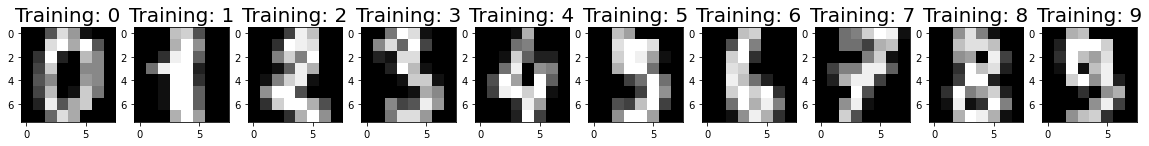

In [9]:
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: ' + str(label), fontsize = 20)

# TODO LO SIGUIENTE ES TEST, SEGUIR BAJANDO HASTA ENCONTRAR SOLUCIÓN DEL EJERCICIO

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, 0:63], df.loc[:, 64:65], test_size=0.15, random_state=0)

In [11]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [12]:
logisticRegr.predict(x_train[:5])

array([9., 9., 9., 1., 9.])

In [13]:
x_train[:5].shape

(5, 64)

In [14]:
x_test.shape

(55, 64)

In [15]:
y_test[:5]

,64
934,9.0
1367,1.0
221,1.0
131,1.0
1076,1.0


In [16]:
x_test[0].shape

(55,)

In [17]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [30]:
digits['target'].shape

(1797,)

In [18]:
lol = df.loc[:, 0:63].values.tolist()
len(lol)

362

In [19]:
y = df.loc[:, 64:65].values.tolist()
len(y)

362

In [20]:
X = np.asarray(lol)
y = np.asarray(y)
print(X, '\n-----', y)

[[ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0. 11. ...  3.  0.  0.]
 [ 0.  0.  0. ... 16.  1.  0.]
 ...
 [ 0.  0.  4. ...  9.  0.  0.]
 [ 0.  0.  4. ...  9.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]] 
----- [[1.]
 [9.]
 [1.]
 [9.]
 [1.]
 [9.]
 [9.]
 [9.]
 [9.]
 [1.]
 [1.]
 [1.]
 [9.]
 [1.]
 [9.]
 [1.]
 [1.]
 [1.]
 [9.]
 [1.]
 [1.]
 [9.]
 [1.]
 [9.]
 [9.]
 [9.]
 [1.]
 [9.]
 [1.]
 [9.]
 [1.]
 [9.]
 [9.]
 [9.]
 [9.]
 [1.]
 [1.]
 [1.]
 [9.]
 [1.]
 [9.]
 [1.]
 [1.]
 [1.]
 [9.]
 [1.]
 [1.]
 [9.]
 [1.]
 [9.]
 [9.]
 [1.]
 [9.]
 [1.]
 [9.]
 [1.]
 [9.]
 [9.]
 [9.]
 [9.]
 [1.]
 [1.]
 [1.]
 [9.]
 [1.]
 [9.]
 [1.]
 [1.]
 [1.]
 [9.]
 [1.]
 [1.]
 [9.]
 [1.]
 [9.]
 [9.]
 [9.]
 [1.]
 [9.]
 [1.]
 [9.]
 [1.]
 [9.]
 [9.]
 [9.]
 [9.]
 [1.]
 [1.]
 [1.]
 [9.]
 [1.]
 [9.]
 [1.]
 [1.]
 [1.]
 [9.]
 [1.]
 [1.]
 [9.]
 [1.]
 [9.]
 [9.]
 [9.]
 [1.]
 [9.]
 [1.]
 [9.]
 [1.]
 [9.]
 [9.]
 [9.]
 [9.]
 [1.]
 [1.]
 [1.]
 [9.]
 [1.]
 [9.]
 [1.]
 [1.]
 [1.]
 [9.]
 [1.]
 [1.]
 [9.]
 [1.]
 [9.]
 [9.]
 [9.]
 [1.]
 [9.]
 [1.]
 [9.]
 [1

In [31]:
y.shape

(362, 1)

In [33]:
y = y.reshape(362)
y

array([1., 9., 1., 9., 1., 9., 9., 9., 9., 1., 1., 1., 9., 1., 9., 1., 1.,
       1., 9., 1., 1., 9., 1., 9., 9., 9., 1., 9., 1., 9., 1., 9., 9., 9.,
       9., 1., 1., 1., 9., 1., 9., 1., 1., 1., 9., 1., 1., 9., 1., 9., 9.,
       1., 9., 1., 9., 1., 9., 9., 9., 9., 1., 1., 1., 9., 1., 9., 1., 1.,
       1., 9., 1., 1., 9., 1., 9., 9., 9., 1., 9., 1., 9., 1., 9., 9., 9.,
       9., 1., 1., 1., 9., 1., 9., 1., 1., 1., 9., 1., 1., 9., 1., 9., 9.,
       9., 1., 9., 1., 9., 1., 9., 9., 9., 9., 1., 1., 1., 9., 1., 9., 1.,
       1., 1., 9., 1., 1., 9., 1., 9., 9., 9., 1., 9., 1., 9., 1., 9., 9.,
       9., 9., 1., 1., 1., 9., 1., 9., 1., 1., 1., 9., 1., 1., 9., 1., 9.,
       9., 9., 1., 9., 1., 9., 1., 9., 9., 9., 9., 1., 1., 1., 9., 1., 9.,
       1., 1., 1., 9., 1., 1., 9., 1., 9., 9., 9., 1., 9., 1., 9., 1., 9.,
       9., 9., 9., 1., 1., 1., 9., 1., 9., 1., 1., 1., 9., 1., 1., 9., 1.,
       9., 9., 9., 1., 9., 1., 9., 1., 9., 9., 9., 9., 1., 1., 1., 9., 1.,
       9., 1., 1., 1., 9.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [35]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [36]:
x_train.shape

(307, 64)

In [37]:
print(y_train[:5])

[9. 9. 9. 1. 9.]


In [38]:
y_test[:5]

array([9., 1., 1., 1., 1.])

In [39]:
x_test.shape

(55, 64)

In [40]:
logisticRegr.predict(x_train[:5])

array([9., 9., 9., 1., 9.])

In [41]:
y_test.shape

(55,)

In [27]:
# y_test = y_test.reshape(55)
# y_test.shape

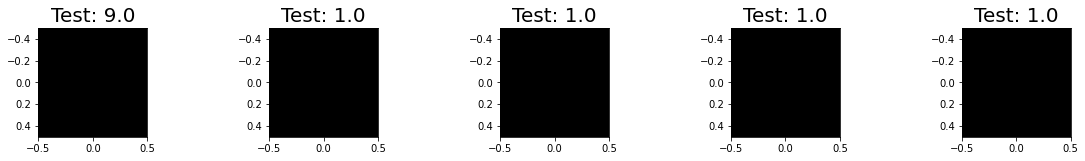

In [43]:
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(x_test[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (1, 1)), cmap=plt.cm.gray)
    plt.title('Test: ' + str(label), fontsize = 20)

### no sé porqué pero no consigo ver las imágenes, sé que tiene que ver con (np.reshape(image, (-1, 1)) el -1 y 1 pero con el resto de numeros no me funcionaba!!

In [54]:
plt.rcParams['figure.figsize'] = 20 , 2
first_test_image = x_test[0]
plt.imshow(np.reshape(first_test_image, (55,1)), cmap=plt.cm.gray)

Exception: Data must be 1-dimensional

In [55]:
plt.rcParams['figure.figsize'] = 20 , 2
first_test_image = x_test[0]
plt.imshow(np.reshape(first_test_image, (5,11)), cmap=plt.cm.gray)

ValueError: Length of passed values is 5, index implies 55.

In [61]:
plt.rcParams['figure.figsize'] = 200 , 10
first_test_image = x_test[0]
plt.imshow(np.reshape(first_test_image, (55,)), cmap=plt.cm.gray)

TypeError: Invalid shape (55,) for image data

### no consigo entender lo de la imagen :(((((((((((

In [62]:
x_test[0].shape

(55,)

In [63]:
logisticRegr.predict(x_test[0].reshape(1, -1))

AttributeError: 'Series' object has no attribute 'reshape'

In [3]:
X = digits.data
y = digits.target

X = X[np.logical_or(y == 1, y == 9)]
y = y[np.logical_or(y == 1, y == 9)]

np.unique(y)

array([1, 9])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [6]:
X_train.shape

(307, 64)

In [8]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [9]:
print(y_train[:5])

[9 9 9 1 9]


In [11]:
logisticRegr.predict(X_train[:5])

array([9, 9, 9, 1, 9])

In [13]:
X_test.shape

(55, 64)

In [14]:
y_test[:5]

array([9, 1, 1, 1, 1])

In [15]:
y_test.shape

(55,)

# SOLUCIÓN DEL EJERCICIO

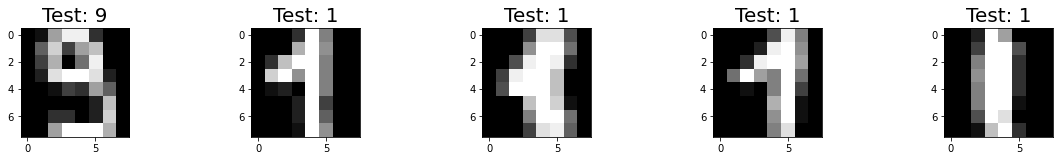

In [17]:
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(X_test[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Test: ' + str(label), fontsize = 20)

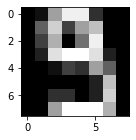

In [19]:
plt.rcParams['figure.figsize'] = 20 , 2
first_test_image = X_test[0]
plt.imshow(np.reshape(first_test_image, (8,8)), cmap=plt.cm.gray)

In [21]:
logisticRegr.predict(X_test[0].reshape(1, -1))

array([9])

In [22]:
max(logisticRegr.predict_proba(X_test[0].reshape(1, -1))[0])

0.9999999949628589

In [23]:
y_test[0:10]

array([9, 1, 1, 1, 1, 9, 9, 9, 1, 9])

In [25]:
logisticRegr.predict(X_test[0:10])

array([9, 1, 1, 1, 1, 9, 9, 9, 1, 9])

In [27]:
logisticRegr.predict_proba(X_test[:1])

array([[5.03714115e-09, 9.99999995e-01]])

In [29]:
sum(logisticRegr.predict_proba(X_test[0:1])[0])

1.0

In [30]:
logisticRegr.classes_

array([1, 9])

In [32]:
max(logisticRegr.predict_proba(X_test[0:1])[0]) # IGUAL QUE CAJA 22

0.9999999949628589

In [34]:
score = logisticRegr.score(X_train, y_train)
score

1.0

In [35]:
score = logisticRegr.score(X_test, y_test)
print(score * 100, "%")

100.0 %


## 3% IMPROVEMENT OF THE PROCESS CAN BE OBSERVED BY HAVING ONLY DIGITS 1 AND 9.